<a href="https://colab.research.google.com/github/JoshuaCarisma/health-companies-analysis/blob/main/Health_apps_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Load and Preprocess the Dataset

In [1]:
import pandas as pd
from sklearn.impute import KNNImputer

# Load the dataset
file_path = 'Imputed_Data.csv'
df = pd.read_csv(file_path)

# Display the first few rows to understand its structure
df.head()

,Year,Revenue ($mm),Subscribers (mm),Commercial Customers,Downloads (mm),Valuation ($mm),Funding ($mm),Source,Users (mm),Registered Users (mm),Device Sales (mm),Net Income/Loss ($mm),Workouts (mm),Activities (bn),Kilometres (bn),Connected Devices
0,2013,1418.000000,2.960000,1224.0,82.6000,4000.000000,121.00,FitBit,35.840000,100.000,17.46,-918.8,377.94,1.26,14.760000,300.0
1,2014,1784.666667,2.361579,1224.0,59.3125,2472.222222,129.75,HeadSpace,50.135135,106.125,14.80,-918.8,377.94,1.26,15.514286,300.0
2,2014,1784.666667,1.880000,1224.0,50.8000,1510.000000,1.00,Calm,50.135135,106.125,14.80,-918.8,377.94,1.26,15.514286,300.0
3,2014,740.000000,1.704000,1224.0,59.3125,3000.000000,129.75,FitBit,6.700000,11.000,10.90,-918.8,377.94,1.26,9.440000,300.0
4,2015,1784.666667,1.880000,1224.0,50.8000,1510.000000,38.00,HeadSpace,50.135135,106.125,14.80,-918.8,377.94,1.26,15.514286,300.0


# Handle Missing Values

In [2]:
# Select numeric columns for imputation
numeric_cols = [
    'Revenue ($mm)', 'Subscribers (mm)', 'Commercial Customers', 'Downloads (mm)',
    'Valuation ($mm)', 'Funding ($mm)', 'Users (mm)', 'Registered Users (mm)',
    'Device Sales (mm)', 'Net Income/Loss ($mm)', 'Workouts (mm)', 'Activities (bn)',
    'Kilometres (bn)', 'Connected Devices'
]

# Apply KNN imputer to fill missing values
imputer = KNNImputer(n_neighbors=5)
df[numeric_cols] = imputer.fit_transform(df[numeric_cols])

# Display the first few rows to ensure missing values are filled
df.head()


,Year,Revenue ($mm),Subscribers (mm),Commercial Customers,Downloads (mm),Valuation ($mm),Funding ($mm),Source,Users (mm),Registered Users (mm),Device Sales (mm),Net Income/Loss ($mm),Workouts (mm),Activities (bn),Kilometres (bn),Connected Devices
0,2013,1418.000000,2.960000,1224.0,82.6000,4000.000000,121.00,FitBit,35.840000,100.000,17.46,-918.8,377.94,1.26,14.760000,300.0
1,2014,1784.666667,2.361579,1224.0,59.3125,2472.222222,129.75,HeadSpace,50.135135,106.125,14.80,-918.8,377.94,1.26,15.514286,300.0
2,2014,1784.666667,1.880000,1224.0,50.8000,1510.000000,1.00,Calm,50.135135,106.125,14.80,-918.8,377.94,1.26,15.514286,300.0
3,2014,740.000000,1.704000,1224.0,59.3125,3000.000000,129.75,FitBit,6.700000,11.000,10.90,-918.8,377.94,1.26,9.440000,300.0
4,2015,1784.666667,1.880000,1224.0,50.8000,1510.000000,38.00,HeadSpace,50.135135,106.125,14.80,-918.8,377.94,1.26,15.514286,300.0


# Verify Data Types and Convert if Necessary

In [3]:
# Verify data types and convert if necessary
df.dtypes

# Convert 'Year' to integer if not already
df['Year'] = df['Year'].astype(int)

# Display data types to ensure correctness
df.dtypes


Year                       int64
Revenue ($mm)            float64
Subscribers (mm)         float64
Commercial Customers     float64
Downloads (mm)           float64
Valuation ($mm)          float64
Funding ($mm)            float64
Source                    object
Users (mm)               float64
Registered Users (mm)    float64
Device Sales (mm)        float64
Net Income/Loss ($mm)    float64
Workouts (mm)            float64
Activities (bn)          float64
Kilometres (bn)          float64
Connected Devices        float64
dtype: object

# Revenue and Growth Analysis

In [4]:
# Year-over-Year Revenue Growth
# Calculate the percentage change in revenue for each app
df['Revenue Growth (%)'] = df.groupby('Source')['Revenue ($mm)'].pct_change() * 100

# Total Revenue Over Time
total_revenue = df.groupby('Source')['Revenue ($mm)'].sum().reset_index()

# Display the results
df.head(), total_revenue


(   Year  Revenue ($mm)  Subscribers (mm)  Commercial Customers  \
 0  2013    1418.000000          2.960000                1224.0   
 1  2014    1784.666667          2.361579                1224.0   
 2  2014    1784.666667          1.880000                1224.0   
 3  2014     740.000000          1.704000                1224.0   
 4  2015    1784.666667          1.880000                1224.0   
 
    Downloads (mm)  Valuation ($mm)  Funding ($mm)     Source  Users (mm)  \
 0         82.6000      4000.000000         121.00     FitBit   35.840000   
 1         59.3125      2472.222222         129.75  HeadSpace   50.135135   
 2         50.8000      1510.000000           1.00       Calm   50.135135   
 3         59.3125      3000.000000         129.75     FitBit    6.700000   
 4         50.8000      1510.000000          38.00  HeadSpace   50.135135   
 
    Registered Users (mm)  Device Sales (mm)  Net Income/Loss ($mm)  \
 0                100.000              17.46                 

In [5]:
# Year-over-Year Revenue Growth
# Calculate the percentage change in revenue for each app
df['Revenue Growth (%)'] = df.groupby('Source')['Revenue ($mm)'].pct_change() * 100

# Total Revenue Over Time
total_revenue = df.groupby('Source')['Revenue ($mm)'].sum().reset_index()

# Display the results
df.head(), total_revenue


(   Year  Revenue ($mm)  Subscribers (mm)  Commercial Customers  \
 0  2013    1418.000000          2.960000                1224.0   
 1  2014    1784.666667          2.361579                1224.0   
 2  2014    1784.666667          1.880000                1224.0   
 3  2014     740.000000          1.704000                1224.0   
 4  2015    1784.666667          1.880000                1224.0   
 
    Downloads (mm)  Valuation ($mm)  Funding ($mm)     Source  Users (mm)  \
 0         82.6000      4000.000000         121.00     FitBit   35.840000   
 1         59.3125      2472.222222         129.75  HeadSpace   50.135135   
 2         50.8000      1510.000000           1.00       Calm   50.135135   
 3         59.3125      3000.000000         129.75     FitBit    6.700000   
 4         50.8000      1510.000000          38.00  HeadSpace   50.135135   
 
    Registered Users (mm)  Device Sales (mm)  Net Income/Loss ($mm)  \
 0                100.000              17.46                 

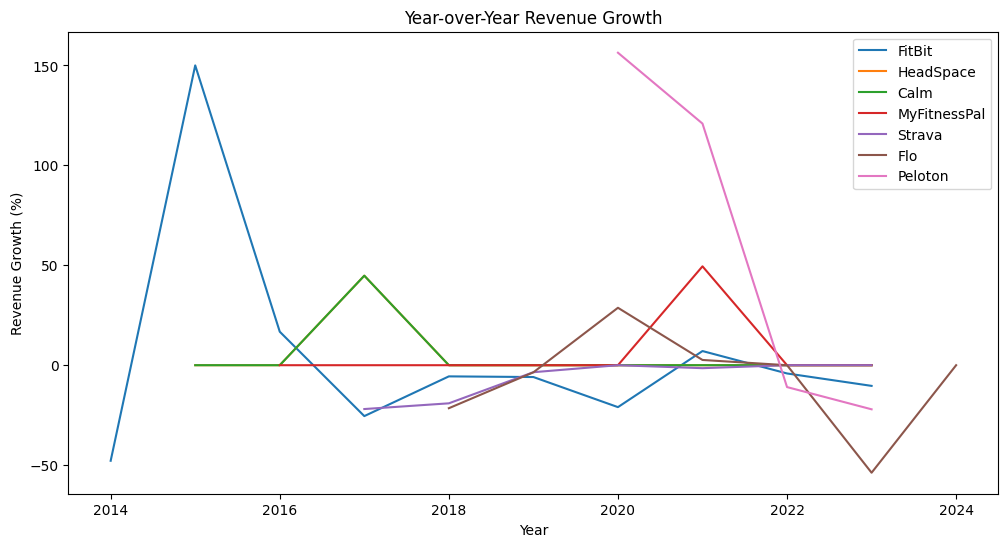

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Year-over-Year Revenue Growth
plt.figure(figsize=(12, 6))
for source in df['Source'].unique():
    plt.plot(df[df['Source'] == source]['Year'], df[df['Source'] == source]['Revenue Growth (%)'], label=source)

plt.title('Year-over-Year Revenue Growth')
plt.xlabel('Year')
plt.ylabel('Revenue Growth (%)')
plt.legend()
plt.show()


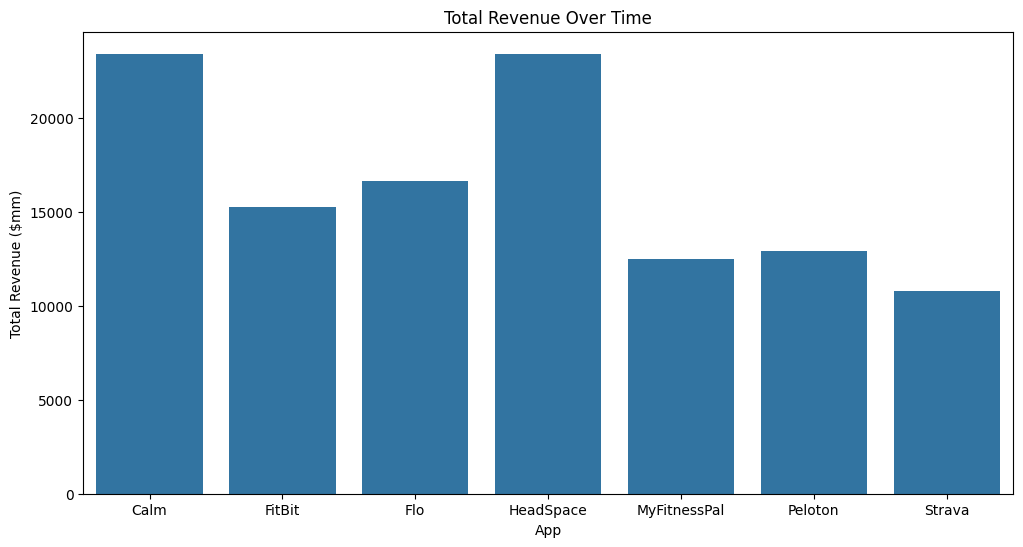

In [9]:
# Total Revenue Over Time
plt.figure(figsize=(12, 6))
sns.barplot(data=total_revenue, x='Source', y='Revenue ($mm)')
plt.title('Total Revenue Over Time')
plt.xlabel('App')
plt.ylabel('Total Revenue ($mm)')
plt.show()


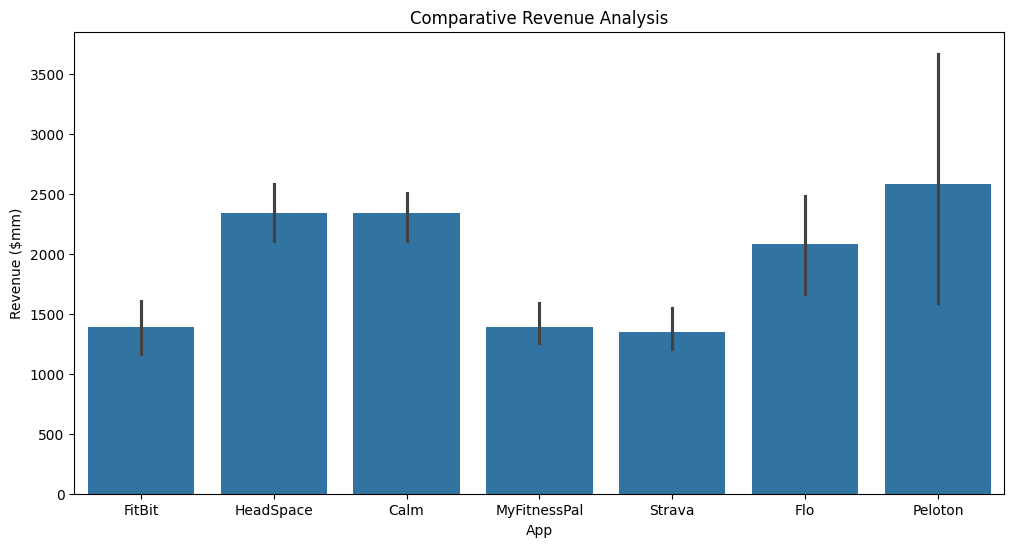

In [16]:
# Comparative Revenue Analysis
plt.figure(figsize=(12, 6))
sns.barplot(x='Source', y='Revenue ($mm)', data=df)
plt.title('Comparative Revenue Analysis')
plt.xlabel('App')
plt.ylabel('Revenue ($mm)')
plt.show()

# User Base and Engagement

In [6]:
# User Growth Trends
user_growth = df.groupby(['Source', 'Year'])['Users (mm)'].sum().unstack().T

# Subscriber Trends
subscriber_trends = df.groupby(['Source', 'Year'])['Subscribers (mm)'].sum().unstack().T

# Display the results
user_growth.head(), subscriber_trends.head()


(Source       Calm  FitBit   Flo  HeadSpace  MyFitnessPal  Peloton  Strava
 Year                                                                     
 2013          NaN   35.84   NaN        NaN           NaN      NaN     NaN
 2014    50.135135    6.70   NaN  50.135135           NaN      NaN     NaN
 2015    50.135135   14.90   NaN  50.135135          50.0      NaN     NaN
 2016    50.135135   23.60   NaN  50.135135          75.0      NaN    20.0
 2017     4.700000   29.00  13.0   4.700000          85.0      NaN    28.0,
 Source      Calm  FitBit    Flo  HeadSpace  MyFitnessPal  Peloton  Strava
 Year                                                                     
 2013         NaN   2.960    NaN        NaN           NaN      NaN     NaN
 2014    1.880000   1.704    NaN   2.361579           NaN      NaN     NaN
 2015    2.361579   1.704    NaN   1.880000         1.704      NaN     NaN
 2016    0.890000   1.704    NaN   0.890000         1.704      NaN   1.704
 2017    0.750000   2.02

In [7]:
# User Growth Trends
user_growth = df.groupby(['Source', 'Year'])['Users (mm)'].sum().unstack().T

# Subscriber Trends
subscriber_trends = df.groupby(['Source', 'Year'])['Subscribers (mm)'].sum().unstack().T

# Display the results
user_growth.head(), subscriber_trends.head()


(Source       Calm  FitBit   Flo  HeadSpace  MyFitnessPal  Peloton  Strava
 Year                                                                     
 2013          NaN   35.84   NaN        NaN           NaN      NaN     NaN
 2014    50.135135    6.70   NaN  50.135135           NaN      NaN     NaN
 2015    50.135135   14.90   NaN  50.135135          50.0      NaN     NaN
 2016    50.135135   23.60   NaN  50.135135          75.0      NaN    20.0
 2017     4.700000   29.00  13.0   4.700000          85.0      NaN    28.0,
 Source      Calm  FitBit    Flo  HeadSpace  MyFitnessPal  Peloton  Strava
 Year                                                                     
 2013         NaN   2.960    NaN        NaN           NaN      NaN     NaN
 2014    1.880000   1.704    NaN   2.361579           NaN      NaN     NaN
 2015    2.361579   1.704    NaN   1.880000         1.704      NaN     NaN
 2016    0.890000   1.704    NaN   0.890000         1.704      NaN   1.704
 2017    0.750000   2.02

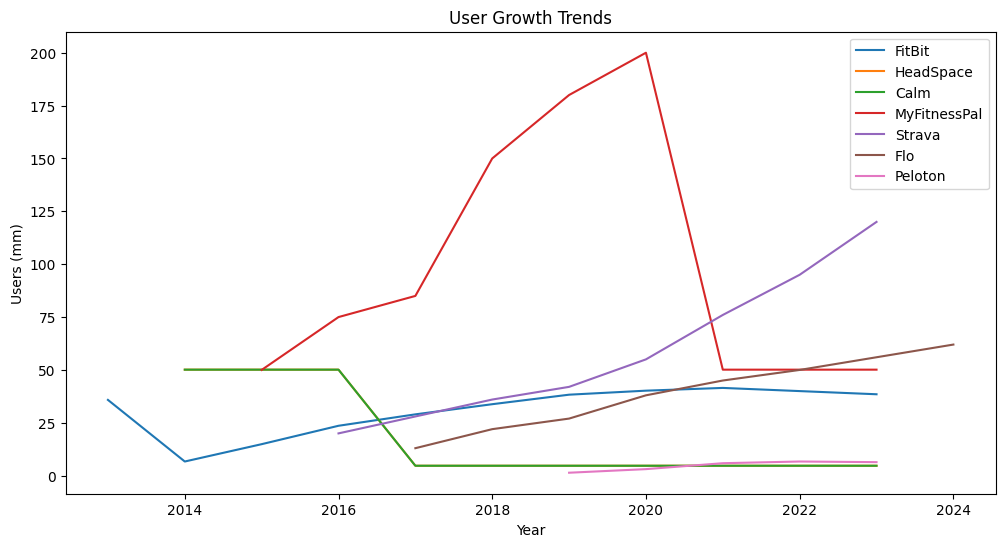

In [10]:
# User Growth Trends
plt.figure(figsize=(12, 6))
for source in df['Source'].unique():
    plt.plot(df[df['Source'] == source]['Year'], df[df['Source'] == source]['Users (mm)'], label=source)

plt.title('User Growth Trends')
plt.xlabel('Year')
plt.ylabel('Users (mm)')
plt.legend()
plt.show()


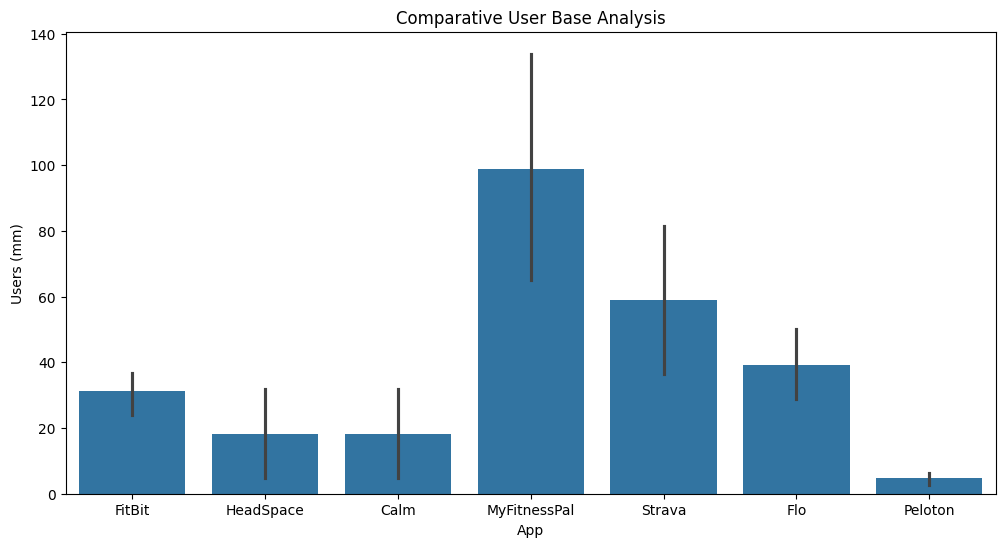

In [17]:
# Comparative User Base Analysis
plt.figure(figsize=(12, 6))
sns.barplot(x='Source', y='Users (mm)', data=df)
plt.title('Comparative User Base Analysis')
plt.xlabel('App')
plt.ylabel('Users (mm)')
plt.show()

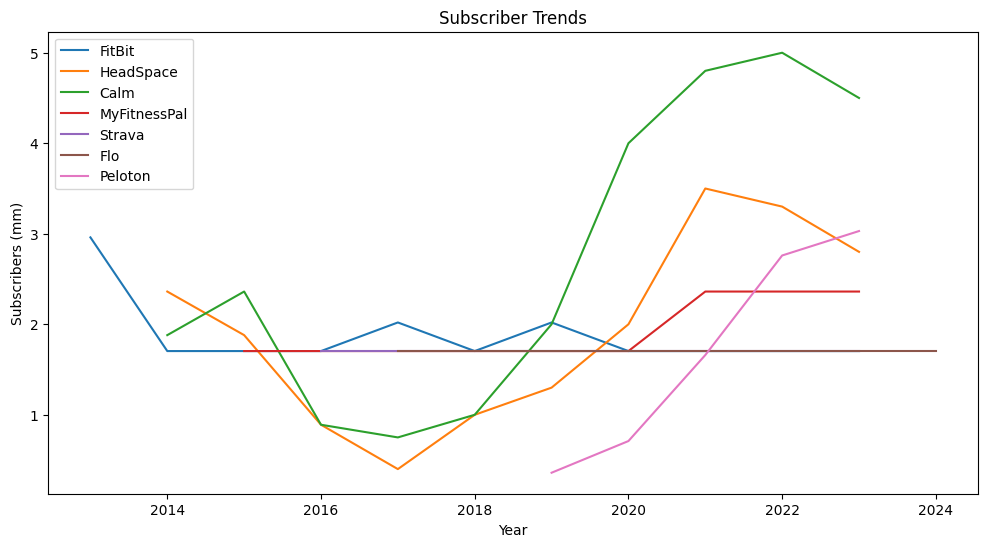

In [11]:
# Subscriber Trends
plt.figure(figsize=(12, 6))
for source in df['Source'].unique():
    plt.plot(df[df['Source'] == source]['Year'], df[df['Source'] == source]['Subscribers (mm)'], label=source)

plt.title('Subscriber Trends')
plt.xlabel('Year')
plt.ylabel('Subscribers (mm)')
plt.legend()
plt.show()


# Predictive Analysis

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this

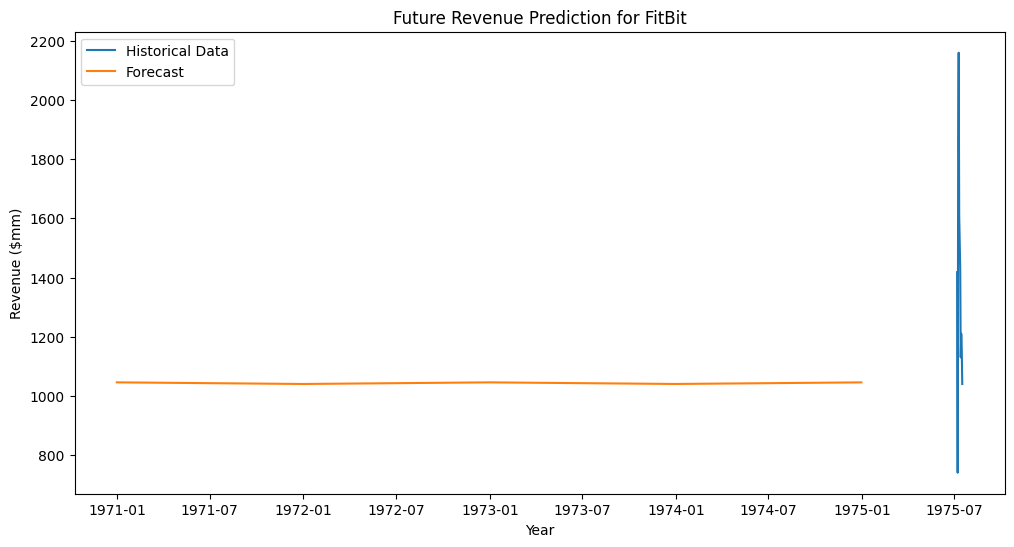

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this

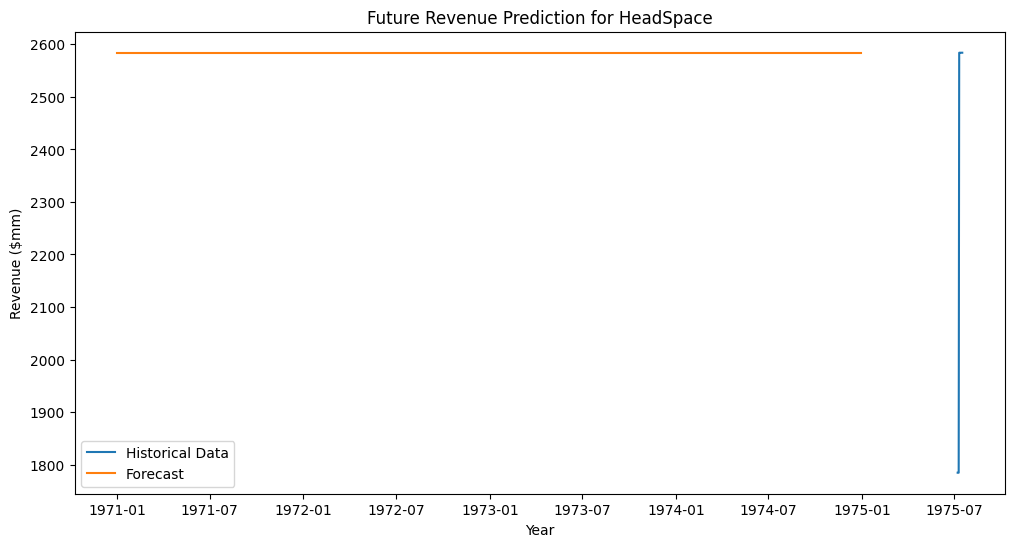

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this

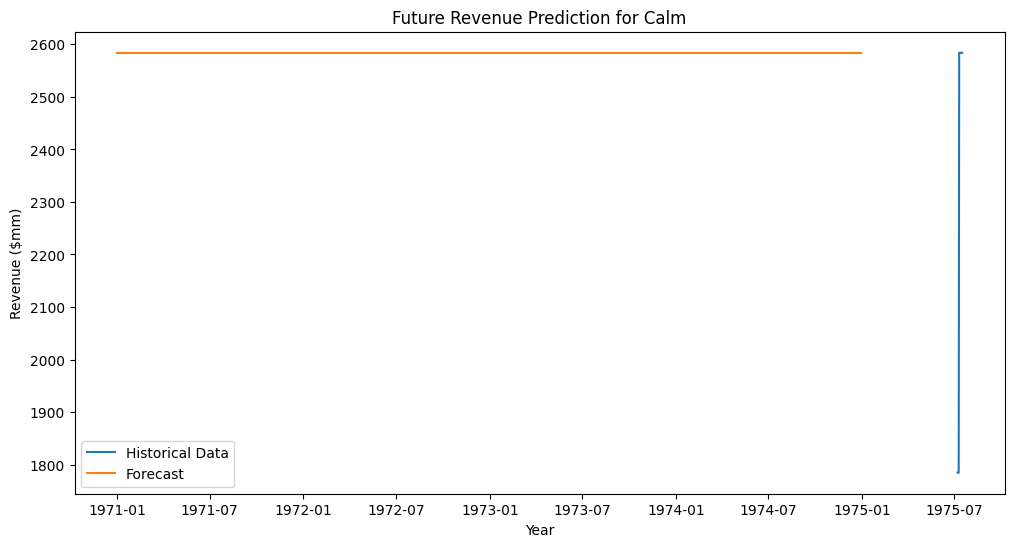

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this

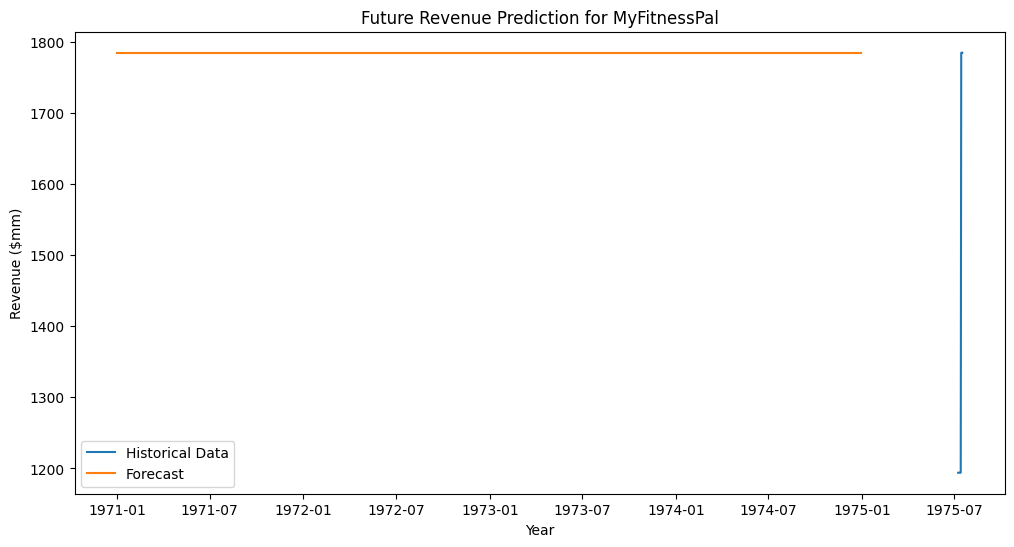

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this

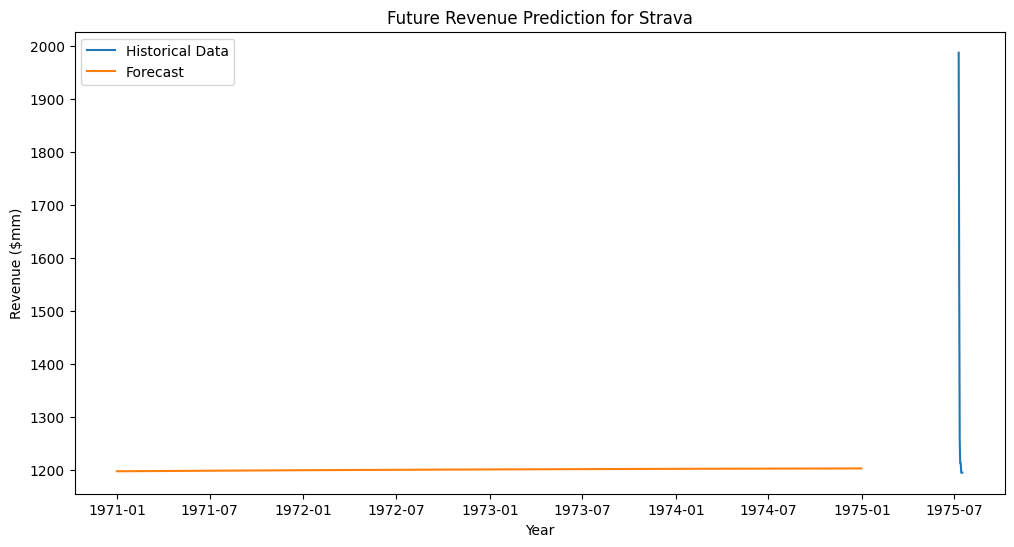

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using

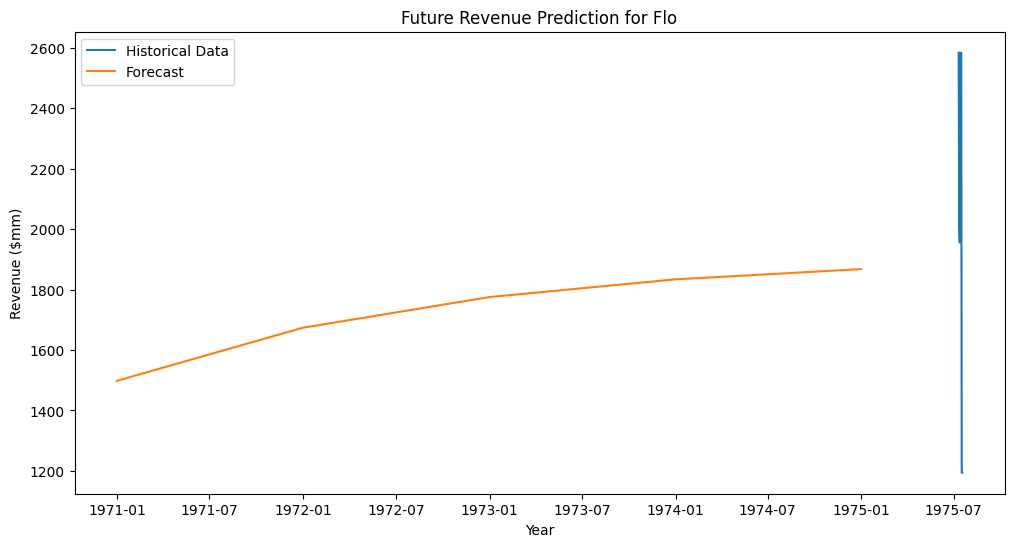

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results w

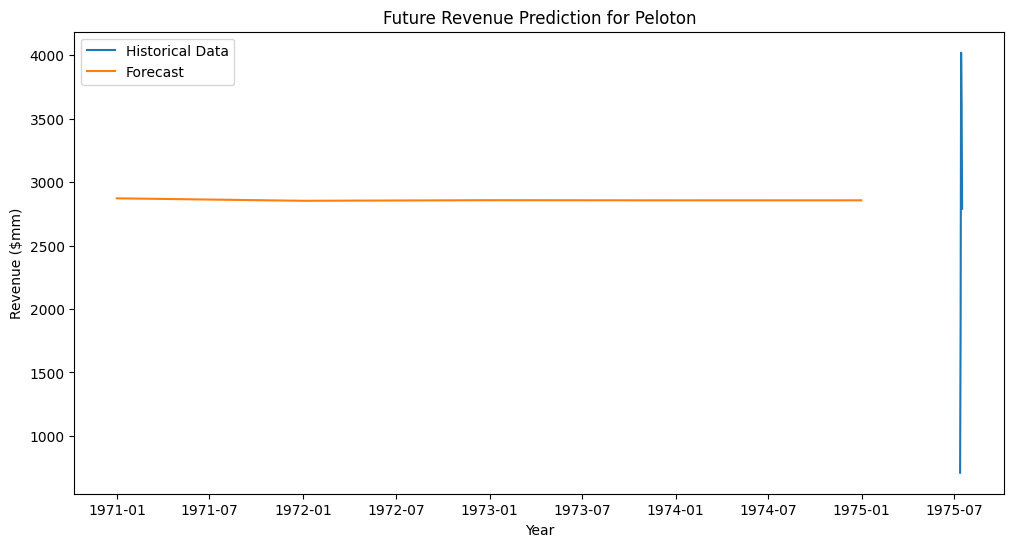

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this

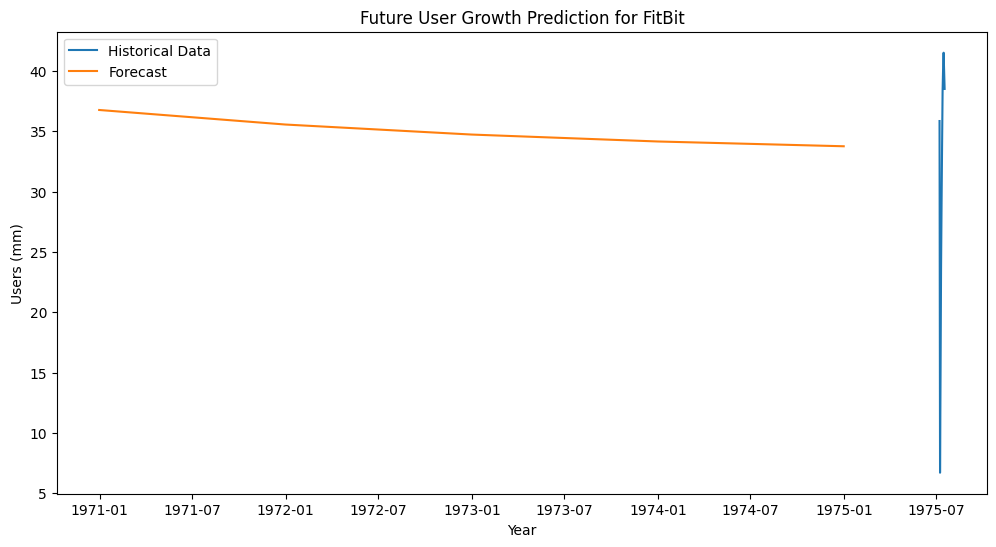

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this

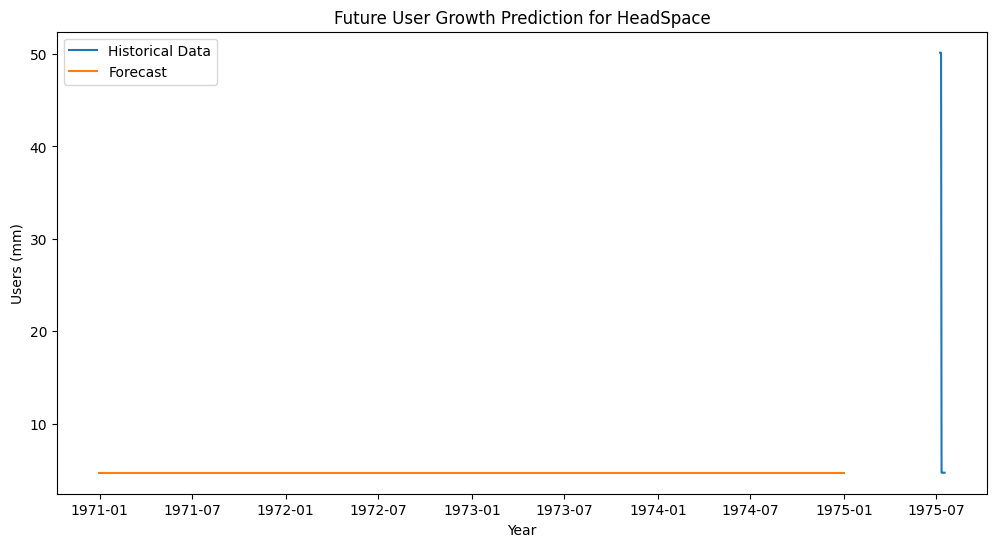

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this

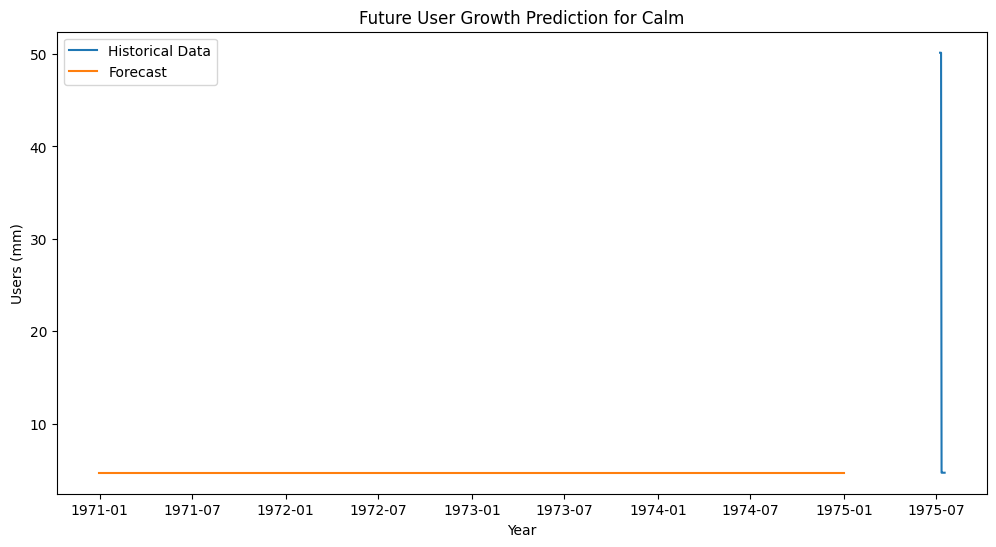

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using

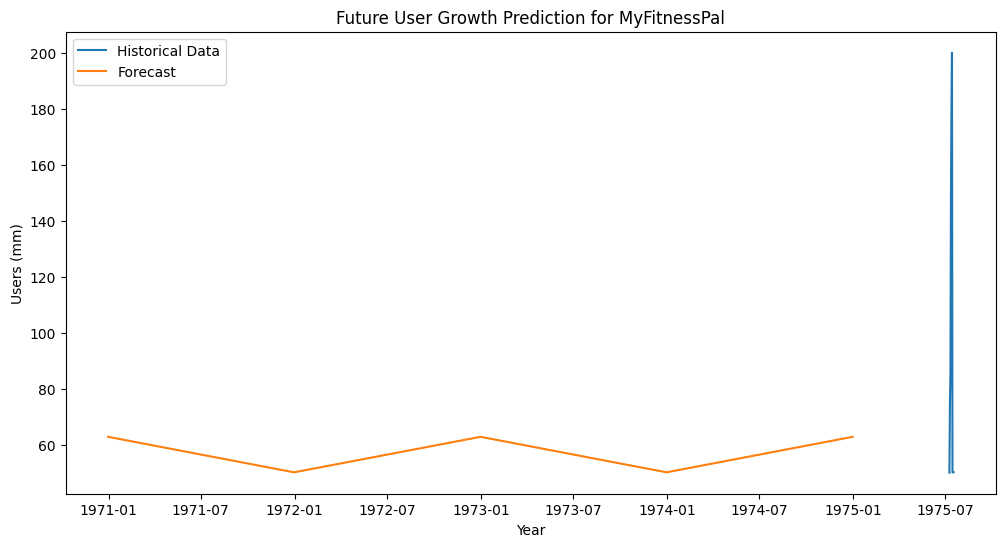

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results w

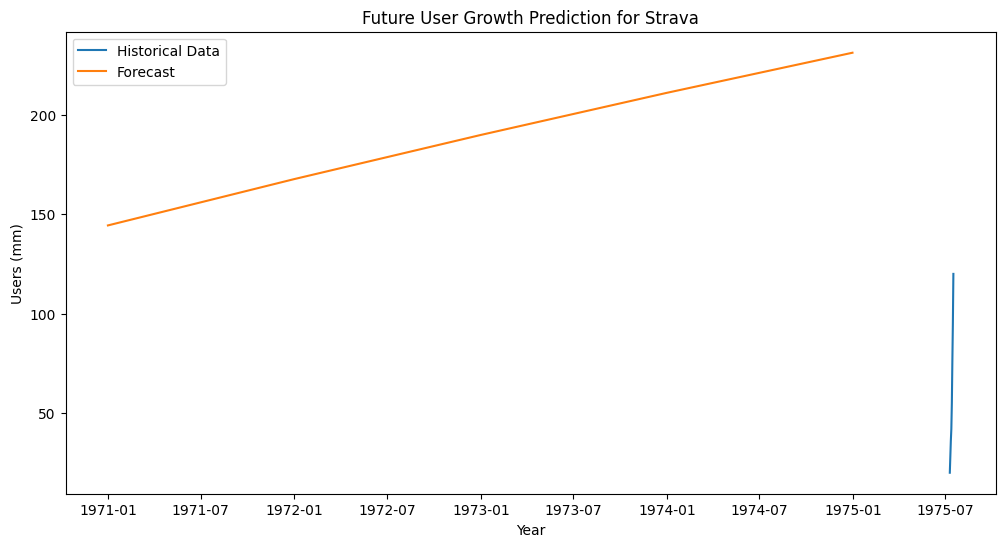

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this

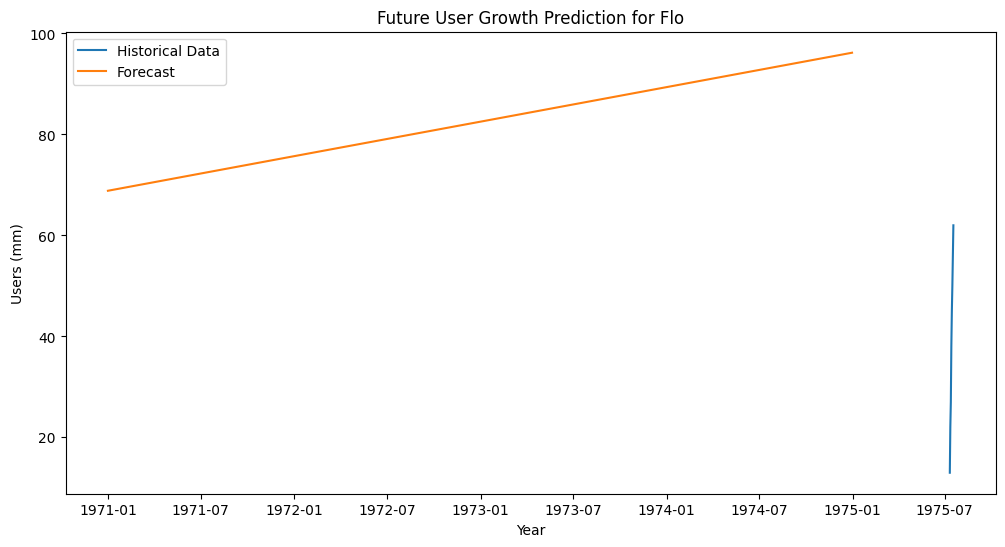

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this

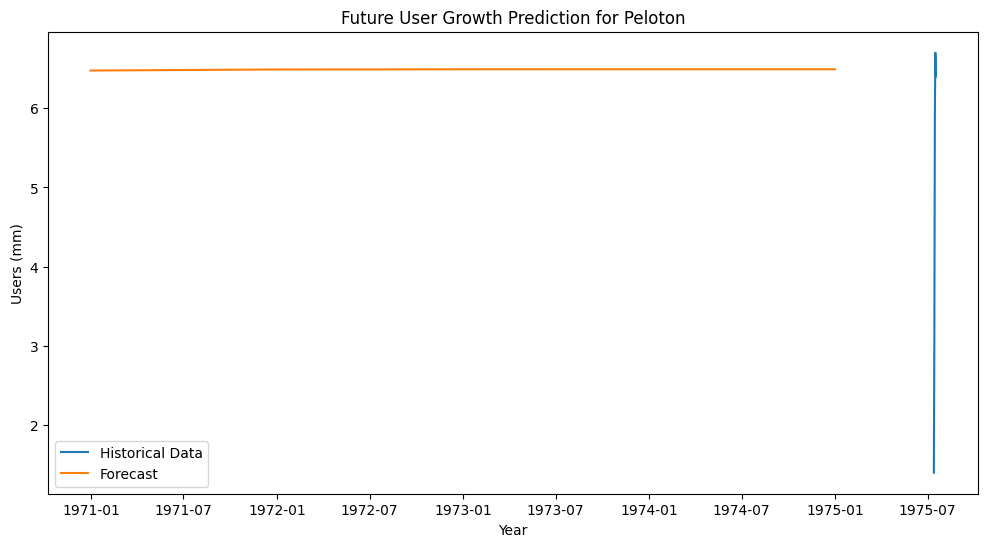

In [19]:
import pandas as pd
import statsmodels.api as sm

# Function to plot time series prediction
def plot_prediction(data, title, ylabel):
    model = sm.tsa.ARIMA(data, order=(1, 1, 1))
    results = model.fit()
    forecast = results.forecast(steps=5)
    forecast_index = pd.date_range(start=data.index[-1] + 1, periods=5, freq='Y')

    plt.figure(figsize=(12, 6))
    plt.plot(data, label='Historical Data')
    plt.plot(forecast_index, forecast, label='Forecast')
    plt.title(title)
    plt.xlabel('Year')
    plt.ylabel(ylabel)
    plt.legend()
    plt.show()

# Predict future revenue for each app
for source in df['Source'].unique():
    revenue_data = df[df['Source'] == source].set_index('Year')['Revenue ($mm)']
    plot_prediction(revenue_data, f'Future Revenue Prediction for {source}', 'Revenue ($mm)')

# Predict future user growth for each app
for source in df['Source'].unique():
    user_data = df[df['Source'] == source].set_index('Year')['Users (mm)']
    plot_prediction(user_data, f'Future User Growth Prediction for {source}', 'Users (mm)')


# Predictive Analysis: User Growth

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this

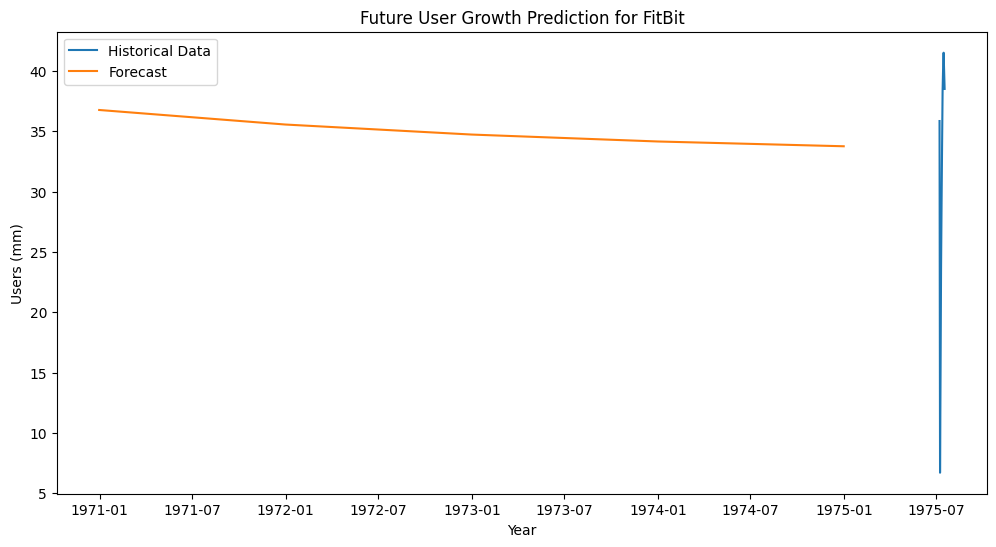

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this

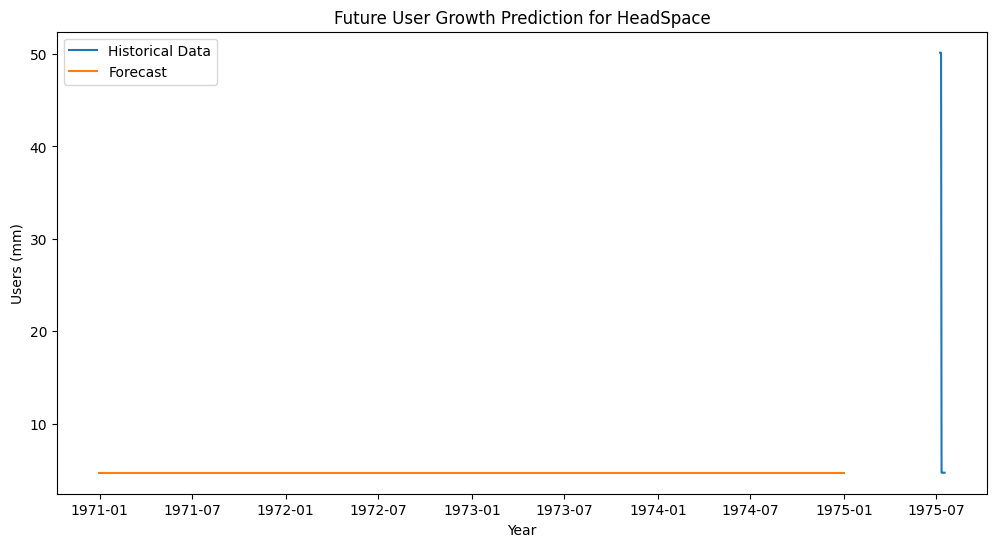

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this

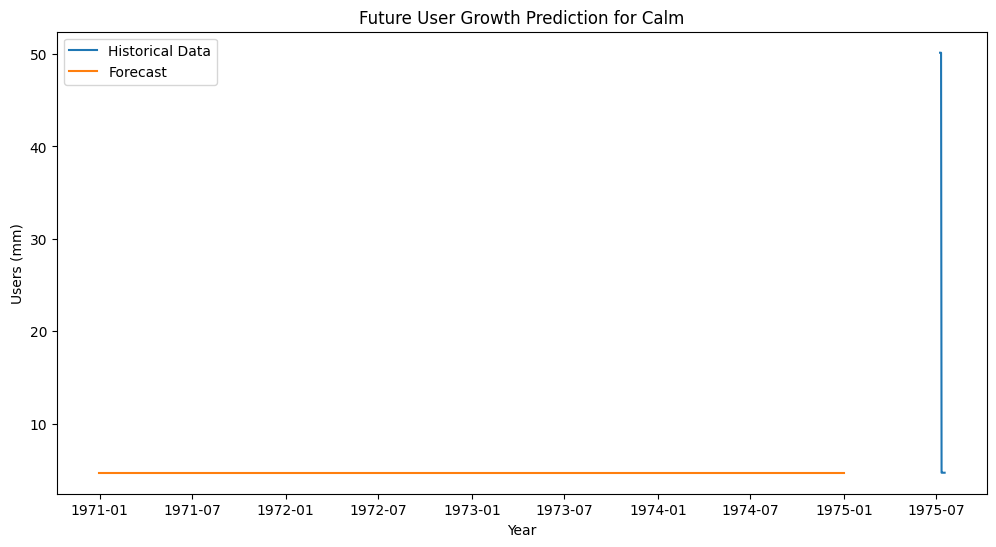

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using

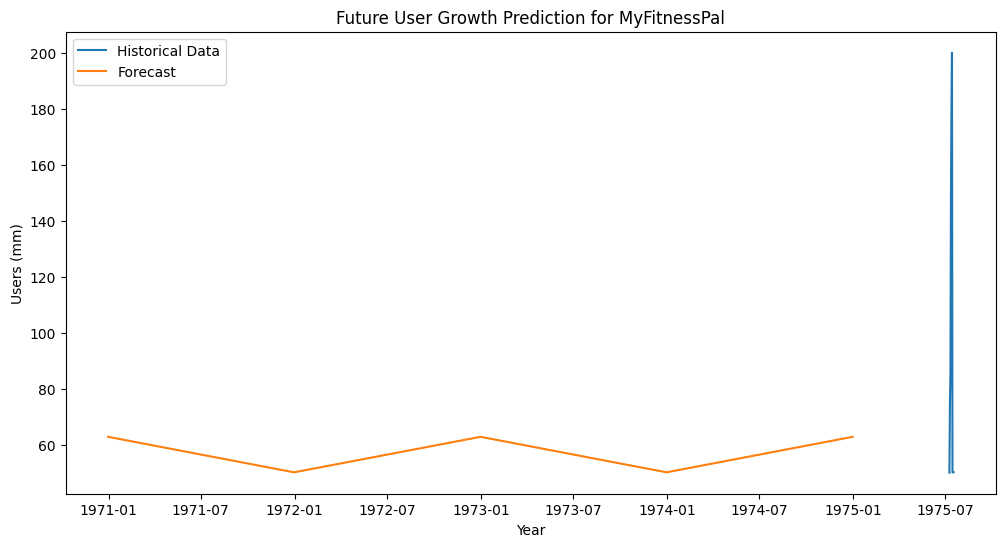

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results w

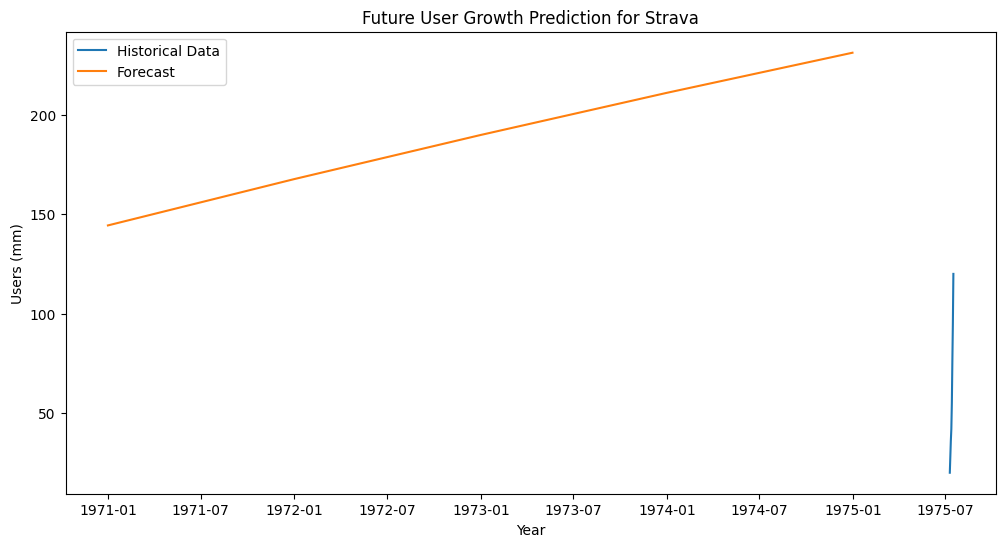

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this

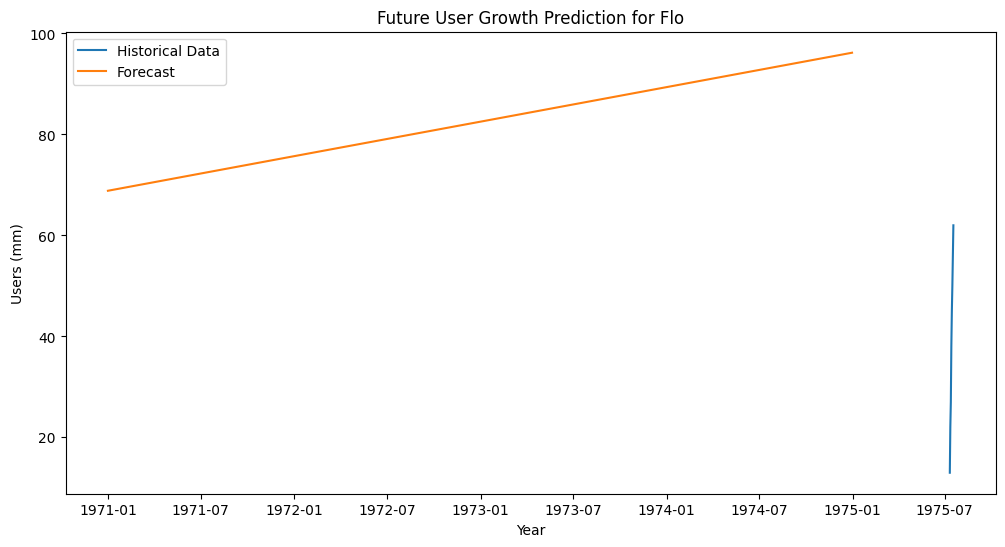

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this

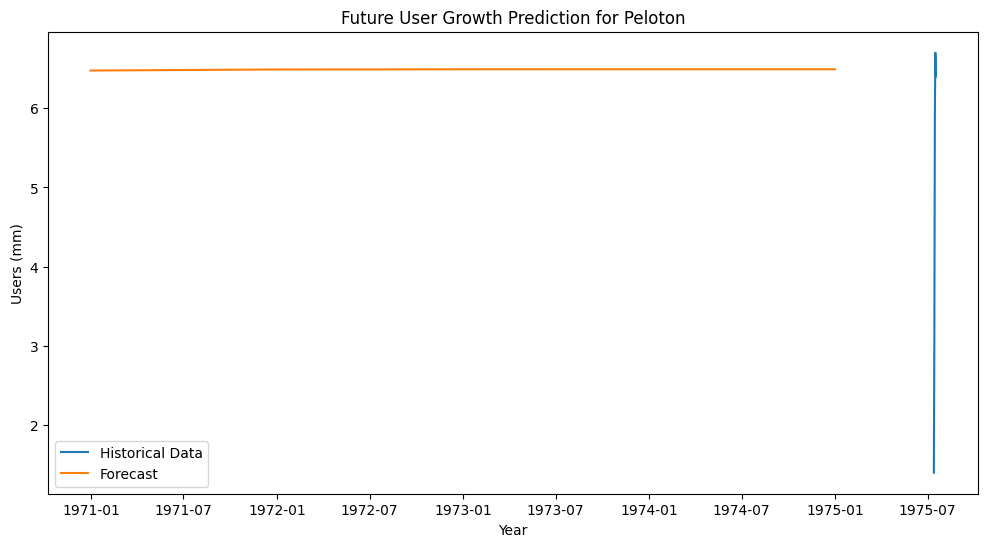

In [20]:
# Predict future user growth for each app
for source in df['Source'].unique():
    user_data = df[df['Source'] == source].set_index('Year')['Users (mm)']
    plot_prediction(user_data, f'Future User Growth Prediction for {source}', 'Users (mm)')
